# Factor analysis

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

stocks_df = pd.read_excel('../data/stockreturns.xlsx')
stocks = stocks_df.values  # convert to numpy array

scaler = StandardScaler()
stocks_scaled = scaler.fit_transform(stocks)

# FA with rotation (default)
fa_default = FactorAnalysis(n_components=3, rotation='varimax')
fa_default.fit(stocks_scaled)
loadings_default = fa_default.components_.T  

# FA NO rotation
fa_none = FactorAnalysis(n_components=3, rotation=None)
fa_none.fit(stocks_scaled)
loadings_none = fa_none.components_.T

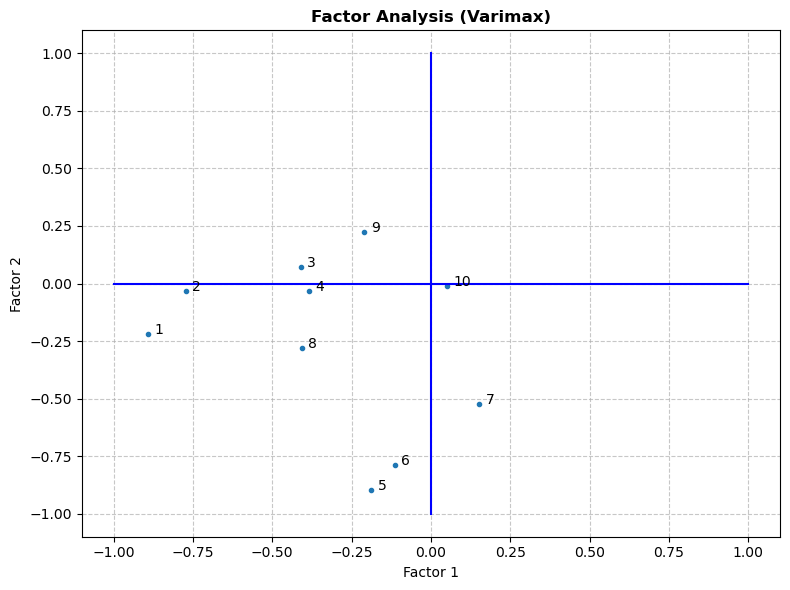

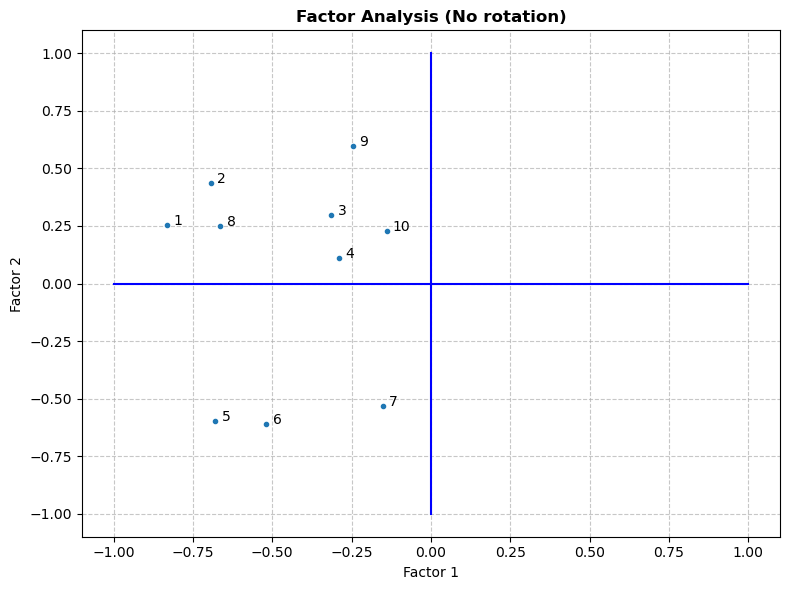

In [147]:
lab = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] # lables
t = np.linspace(-1, 1, 20) # reference line vector

def plot_factor_loadings(loadings, title):
    plt.figure(figsize=(8, 6))
    plt.plot(loadings[:, 0], loadings[:, 1], '.')
    plt.plot(t, np.zeros_like(t), 'b')  # horizontal line
    plt.plot(np.zeros_like(t), t, 'b')  # vertical line
    
    # add labels
    for i, txt in enumerate(lab):
        plt.annotate(txt, (loadings[i, 0] + 0.02, loadings[i, 1]))
    
    plt.xlabel('Factor 1')
    plt.ylabel('Factor 2')
    plt.title(title, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

plot_factor_loadings(loadings_default, 'Factor Analysis (Varimax)')
plot_factor_loadings(loadings_none, 'Factor Analysis (No rotation)')

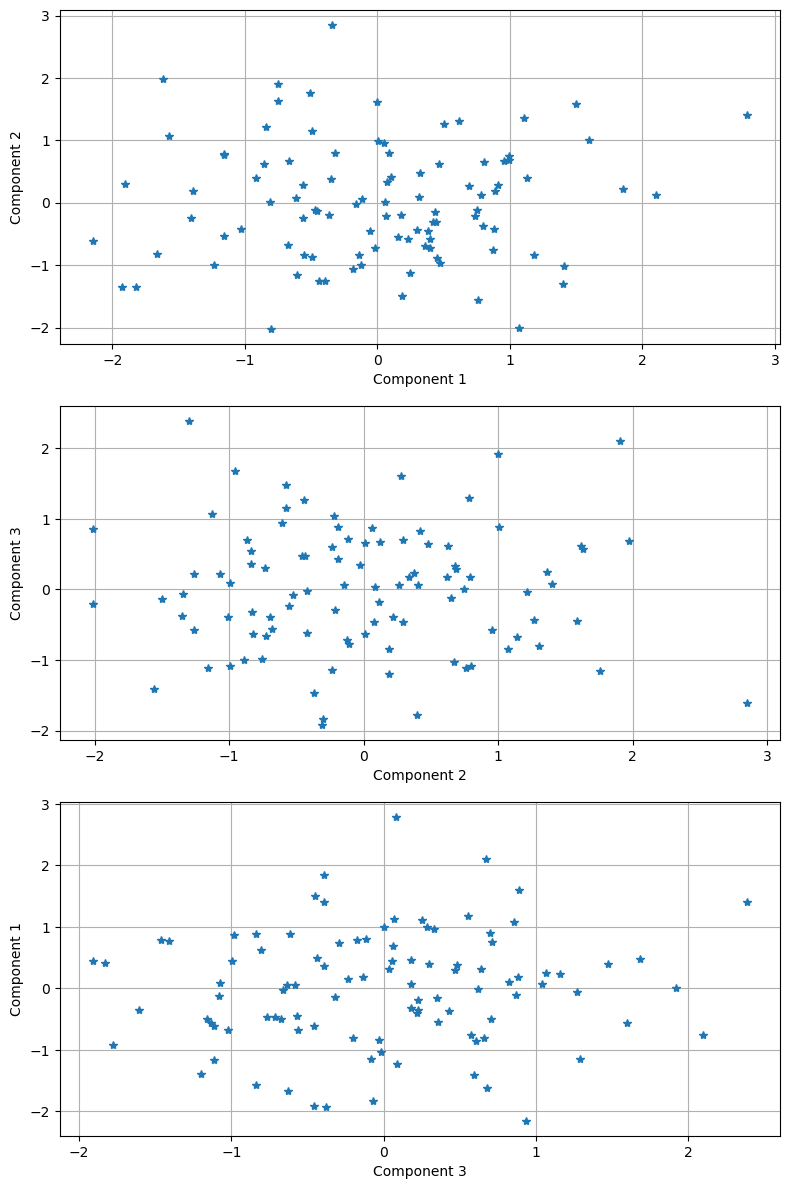

In [148]:
fa_scores = fa_default.transform(stocks_scaled)
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(fa_scores[:, 0], fa_scores[:, 1], '*')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].grid(True)

axes[1].plot(fa_scores[:, 1], fa_scores[:, 2], '*')
axes[1].set_xlabel('Component 2')
axes[1].set_ylabel('Component 3')
axes[1].grid(True)

axes[2].plot(fa_scores[:, 2], fa_scores[:, 0], '*')
axes[2].set_xlabel('Component 3')
axes[2].set_ylabel('Component 1')
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Carry out a factor analysis for your data

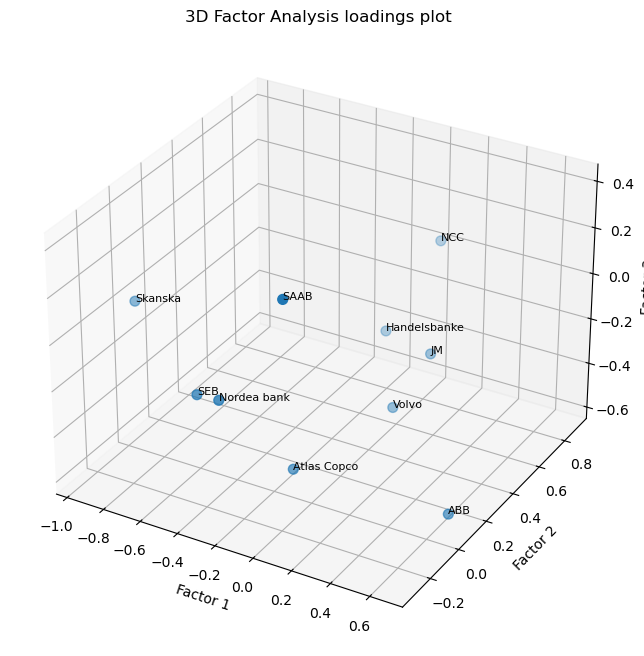

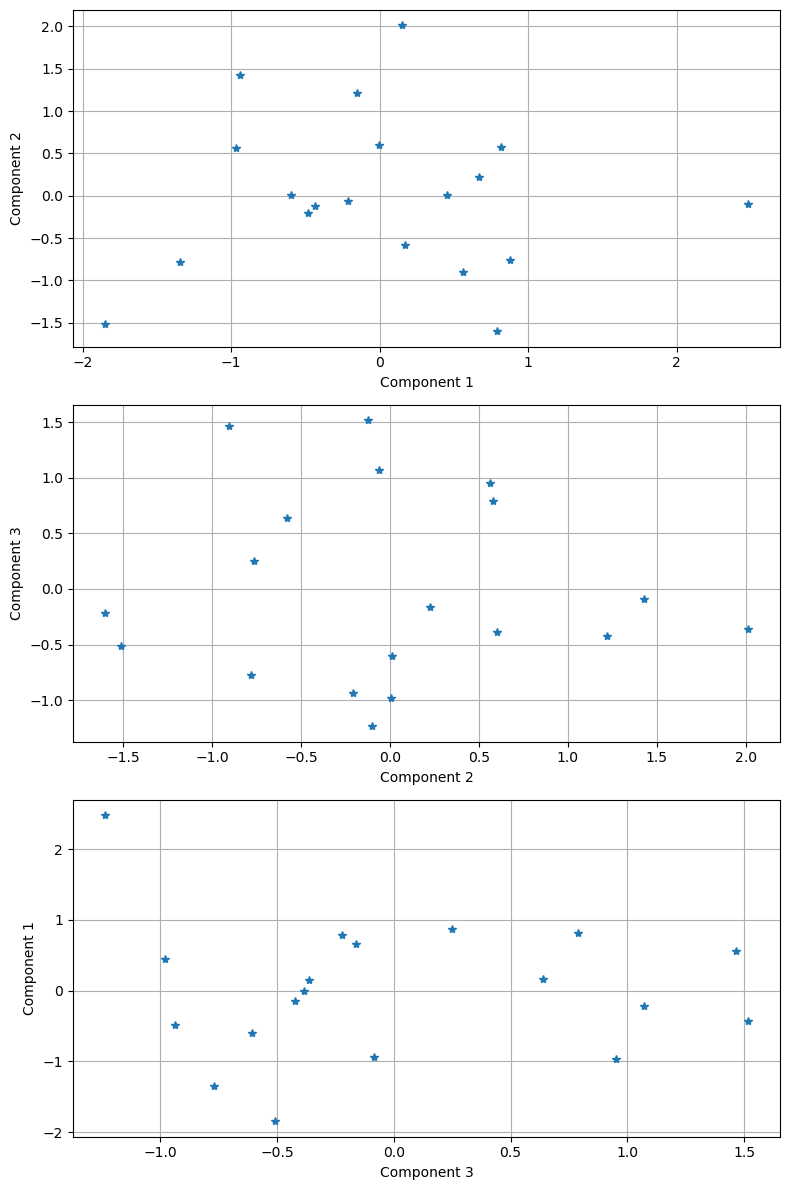

In [149]:
data = pd.read_csv('../data/my_stock_returns.csv')

my_stocks_scaled = StandardScaler().fit_transform(data.values)
stock_names = data.columns.tolist()

# FA with varimax rotation
fa = FactorAnalysis(n_components=3, rotation='varimax')
fa.fit(my_stocks_scaled)
loadings = fa.components_.T

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
ax.scatter(loadings[:, 0], loadings[:, 1], loadings[:, 2], s=50)
for i in range(len(loadings)):
    ax.text(loadings[i, 0], loadings[i, 1], loadings[i, 2], stock_names[i], size=8)

for spine in ['xy', 'xz', 'yz']:
    ax.grid(True, ls='--', alpha=0.3, which='major', zorder=0)

ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_zlabel('Factor 3')
ax.set_title('3D Factor Analysis loadings plot')

# subplots for component visualization
fa_scores = fa.transform(my_stocks_scaled)
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].plot(fa_scores[:, 0], fa_scores[:, 1], '*')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].grid(True)

axes[1].plot(fa_scores[:, 1], fa_scores[:, 2], '*')
axes[1].set_xlabel('Component 2')
axes[1].set_ylabel('Component 3')
axes[1].grid(True)

axes[2].plot(fa_scores[:, 2], fa_scores[:, 0], '*')
axes[2].set_xlabel('Component 3')
axes[2].set_ylabel('Component 1')
axes[2].grid(True)

plt.tight_layout()
plt.show()